# Reproducible data analysis

## Seattle Fremont Bridge bike count data

Here again, is how we downloaded the bike data, but using a jupyter notebook instead of a python script executed by bash script in the Unix shell. 
- Either re-download here, or edit path to where you saved it yesterday

Download data from here: https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k

Right click on 'CSV' and copy link location

In [1]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [2]:
from urllib.request import urlretrieve

In [3]:
# You can now download the data from the database
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x2d1f1940a58>)

In [23]:
# we can use some bash commands in jupyter with the ! before the command
!head Fremont.csv
#!head ./bikedata/Fremont.csv

Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
10/03/2012 12:00:00 AM,9,4
10/03/2012 01:00:00 AM,6,4
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,3,2
10/03/2012 04:00:00 AM,1,6
10/03/2012 05:00:00 AM,10,21
10/03/2012 06:00:00 AM,50,105
10/03/2012 07:00:00 AM,95,257
10/03/2012 08:00:00 AM,146,291


In [22]:
# but since this is a dataframe, let's use pandas
import pandas as pd
data = pd.read_csv('Fremont.csv')
#data = pd.read_csv('./bikedata/Fremont.csv')
data.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,9.0,4.0
1,10/03/2012 01:00:00 AM,6.0,4.0
2,10/03/2012 02:00:00 AM,1.0,1.0
3,10/03/2012 03:00:00 AM,3.0,2.0
4,10/03/2012 04:00:00 AM,1.0,6.0


In [6]:
# set index column as the date
data = pd.read_csv('Fremont.csv', index_col='Date')
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
10/03/2012 12:00:00 AM,9.0,4.0
10/03/2012 01:00:00 AM,6.0,4.0
10/03/2012 02:00:00 AM,1.0,1.0
10/03/2012 03:00:00 AM,3.0,2.0
10/03/2012 04:00:00 AM,1.0,6.0


In [7]:
# let's parse the Date string
# allows us to manipulate and use pieces of the Date information
# takes a little while to parse the dates
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


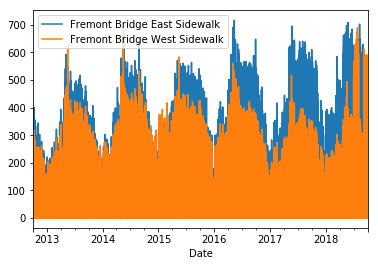

In [8]:
# let's check out the data!
# plots matplotlib plots in the notebook instead of separate window
%matplotlib inline 
data.plot()

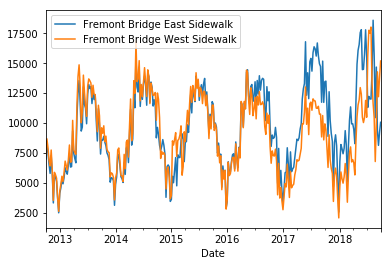

In [9]:
# This is a bit dense
# Let's take total number of rides each week 
# instead of each day across all years
data.resample('W').sum().plot()
# looks like traffic is increasing and in one year there 
# was more on the East than West side

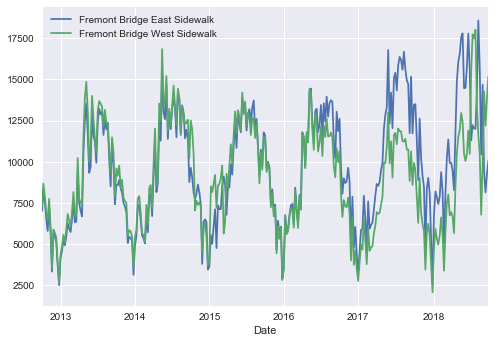

In [10]:
# let's change the default matplotlib style to something else

import matplotlib.pyplot as plt
plt.style.use('seaborn') #seaborn is a differnt style
data.resample('W').sum().plot();

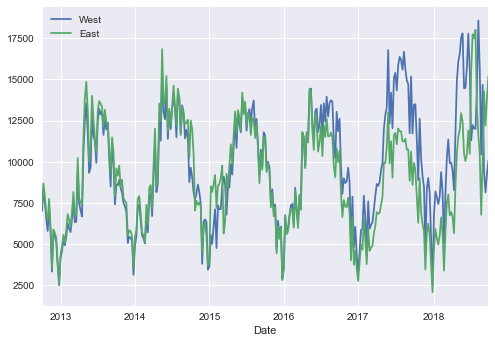

In [11]:
# edit legend names
data.columns = ['West', 'East'] 
data.resample('W').sum().plot()

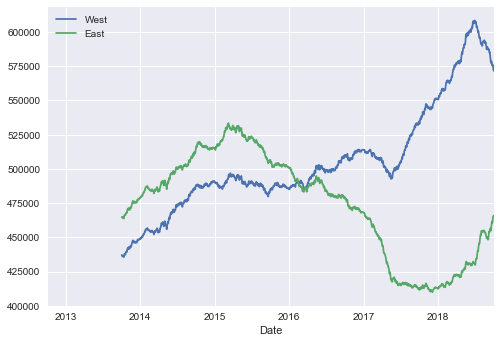

In [12]:
# is there an annual trend? annual growth or decline?
# make a rolling window
# resample daily, sum over the whole year
data.resample('D').sum().rolling(365).sum().plot()

(0, 618365.34999999998)

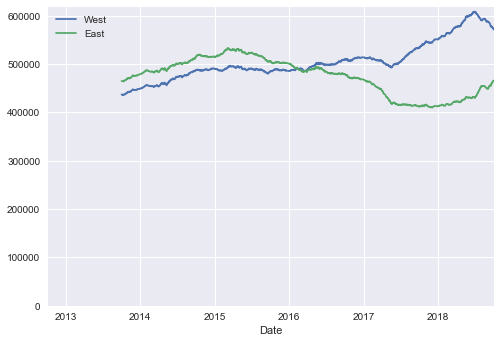

In [13]:
# the axes don't start at 0, let's adjust that
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None) #0 to None (curent maximum)
# ok, the change is a little less dramatic now

(0, 1080850.45)

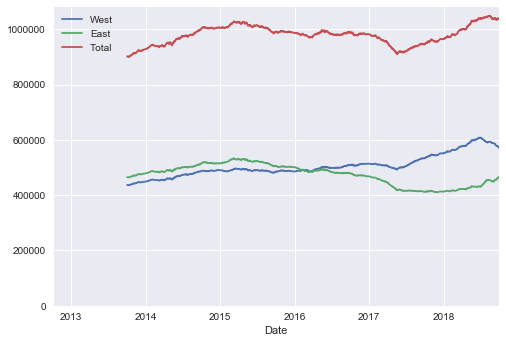

In [14]:
# Let's look at the total traffic 
# We can add columns to the dataframe
data['Total'] = data['West'] + data['East']
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None) #0 to None (curent maximum)

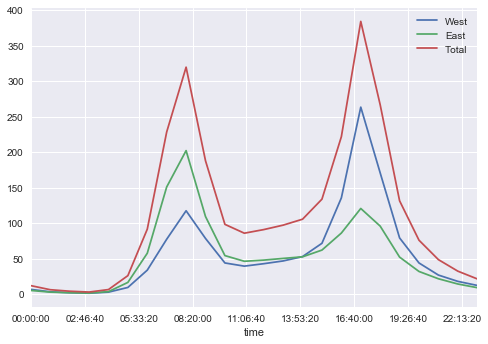

In [15]:
# trend within individual days
# group by time of day, take the mean over all years, and plot
data.groupby(data.index.time).mean().plot()

# interesting trends!
# East side peaks in the morning
# West side peaks in the afternoon
# looks like a commute pattern

In [16]:
# let's look at this for the whole dataset
    # trends in traffic by time of day for each year
# good way to do this is to make a pivot table
# the pivot table will show traffic 
pivoted = data.pivot_table('Total', index = data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5] # recall that iloc lets us subset the dataframe

# col = day
# row = hour during that day

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


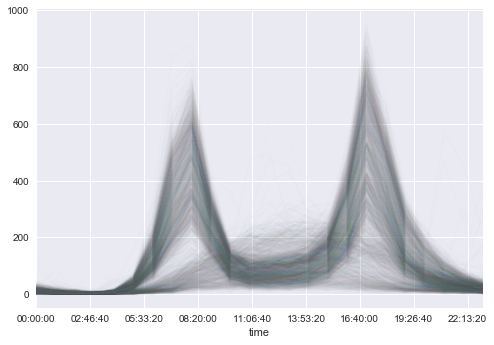

In [17]:
# let's plot this
pivoted.plot(legend=False, alpha=0.01)
# alpha = transparency

In [18]:
# We can see the bimodal commute pattern
# there's also a slight peak in the middle
# might be week day vs. weekend traffic

# We can't see West vs. East trends anymore though
# How would you do this?

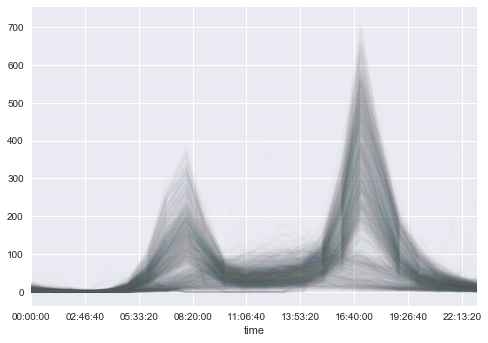

In [19]:
pivoted_West = data.pivot_table('West', index = data.index.time, columns=data.index.date)
pivoted_West.plot(legend=False, alpha=0.01)
# West still peaks in afternoon

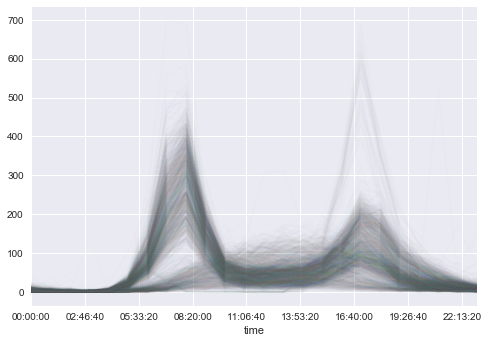

In [20]:
pivoted_East = data.pivot_table('East', index = data.index.time, columns=data.index.date)
pivoted_East.plot(legend=False, alpha=0.01)
# East still peaks in morning

Now, we'll learn how to work with jupyter notebooks and Github to add version control to our reproducible data analysis.